In [0]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
root_path = '/content/drive/My Drive/ASL/'
train = pd.read_csv(root_path+'sign_mnist_train.csv').to_numpy()
test = pd.read_csv(root_path+'sign_mnist_test.csv').to_numpy()
# create X_train, Y_train, X_test and Y_test as numpy arrays of correct shape
X_train = train[:,1:].reshape(-1,28,28,1)
X_test = test[:,1:].reshape(-1,28,28,1)
Y_train = tf.keras.utils.to_categorical(train[:,0], num_classes=26, dtype='int32')
Y_test = tf.keras.utils.to_categorical(test[:,0], num_classes=26, dtype='int32')
print("X-train shape = ", X_train.shape)
print("Y-train shape = ", Y_train.shape)
print("X-test shape = ", X_test.shape)
print("Y-test shape = ", Y_test.shape)

X-train shape =  (27455, 28, 28, 1)
Y-train shape =  (27455, 26)
X-test shape =  (7172, 28, 28, 1)
Y-test shape =  (7172, 26)


Alphabet -  O


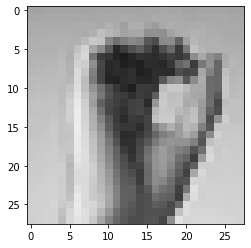

In [4]:
example = 234
plt.imshow(X_train[example,:,:,0], cmap='gray', vmin=0, vmax=255)
print("Alphabet - ", chr(ord('A') + np.argmax(Y_train[example])))

In [0]:
def model(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  

    """
    X_input = Input(input_shape, name="Input1")

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(16, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # # CONV -> BN -> RELU Block applied to X
    # X = Conv2D(64, (3, 3), strides = (2, 2), name = 'conv1')(X)
    # X = BatchNormalization(name = 'bn1')(X)
    # X = Activation('relu')(X)


    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(26, activation='softmax', name='FC')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Basic Model')

    return model

In [15]:
model = model(X_train.shape[1:])
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ["accuracy"])
model.summary()

Model: "Basic Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input1 (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 34, 34, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 28, 28, 16)        800       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 28, 28, 16)        64        
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              

In [16]:
model.fit(x = X_train, y = Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
27455/27455 [==============================] - 3s 104us/step - loss: 0.4780 - accuracy: 0.8775
Epoch 2/5
27455/27455 [==============================] - 3s 97us/step - loss: 0.0132 - accuracy: 1.0000
Epoch 3/5
27455/27455 [==============================] - 3s 96us/step - loss: 0.0045 - accuracy: 1.0000
Epoch 4/5
27455/27455 [==============================] - 3s 97us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 5/5
27455/27455 [==============================] - 3s 96us/step - loss: 0.0014 - accuracy: 1.0000


In [27]:
model.evaluate(x = X_test, y= Y_test)

7172/7172 [==============================] - 1s 97us/step


[0.6188985040266954, 0.8633574843406677]

[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 406   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  22   0   0]
 [  0   0 289   0   0  21   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 481   0   0   0   0   0   0   0   0   0   0   0   0  17   0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 266  21   0   0   0   1   0   0  20  39   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0  41 375   0  14   0   0   0   0   0   0   0   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 221   8   0   0   1   0   0   0  21   0   0   0   0   0   0  37]
 [  0   0   0   0   0   0   0   0   0 267   0   0   0   0   1   0  42  21   0   0   0   0   0   0]
 [  0   0 

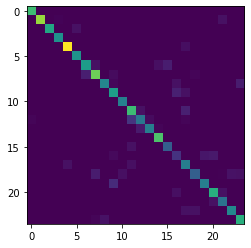

In [36]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y = np.argmax(Y_test,axis=-1)
cm = confusion_matrix(y, y_pred)
plt.imshow(cm)
np.set_printoptions(linewidth=np.inf)
print(cm)

# **Some Observations:**
- It is overfitting training data even with 1 conv layer and 1 dense layer.
- Testing accuracy = 86.5 %
- For some alphabets - it perform really well i.e. 'A', 'E', 'F'.
- For some alphabets, it is getting confused with others like 'R' with 'K' and 'I'.

Alphabet -  R


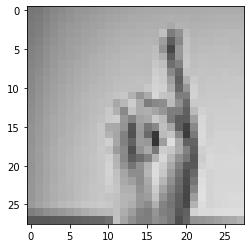

Alphabet -  K


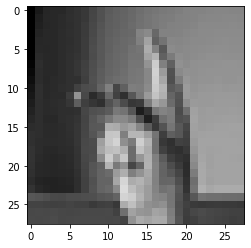

Alphabet -  I


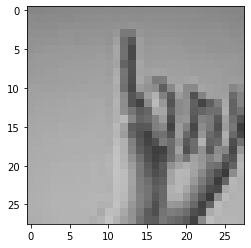

In [42]:
example = 16
plt.imshow(X_train[example,:,:,0], cmap='gray', vmin=0, vmax=255)
print("Alphabet - ", chr(ord('A') + np.argmax(Y_train[example])))
plt.show()
example = 11
plt.imshow(X_train[example,:,:,0], cmap='gray', vmin=0, vmax=255)
print("Alphabet - ", chr(ord('A') + np.argmax(Y_train[example])))
plt.show()
example = 6
plt.imshow(X_train[example,:,:,0], cmap='gray', vmin=0, vmax=255)
print("Alphabet - ", chr(ord('A') + np.argmax(Y_train[example])))
plt.show()